In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE

In [0]:
#load data
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

In [5]:
#select 10000 images randomly

np.random.seed(123)
indices = np.random.choice(70000,10000)
X = mnist.data[indices] / 255.0
y = mnist.target[indices]

print(X.shape, y.shape)

(10000, 784) (10000,)


Apply t-SNE to the data by setting n_components=2.

In [6]:
#tsne with 2 components, perplexity 40, iterations 300
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.211s...
[t-SNE] Computed neighbors for 10000 samples in 188.418s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.836341
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.920555
[t-SNE] KL divergence after 300 iterations: 2.529222


This is interesting because the KL divergence after all 300 iterations is very small (2.53). It seems like t-SNE has performed very well in terms of maintaining the local similarities.

Using the two-dimensional t-SNE representation, draw a graph of the data by coloring and labeling the data points as we did in the checkpoint.

In [7]:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(tsne_results.shape[0]):
    plt.text(tsne_results[i, 0], tsne_results[i, 1], str(y[i]),
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Do you think t-SNE solution is satisfactory? Can you distinguish between different classes easily? Which one has done a better job: t-SNE or the PCA you applied in the assignment of the previous checkpoint?

To fully answer this, it will be helpful to look at a graphic that is not colored. 

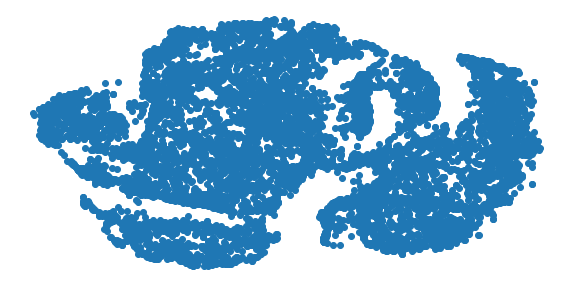

In [8]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

So, this is more helpful than the PCA graphic but is not perfect. Without the using of coloring the clusters, it is difficult make out all of the classes, particularly the ones in the middle. But, it does better than PCA because it was difficult to distinguish any classes at all with the PCA uncolored graph. Here, we can at least easily distinguish a few of the classes.

Now, play with the different perplexity values and apply t-SNE for each of them. Which perplexity value is the best one in terms of the two-dimensional representation clarity?

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.908s...
[t-SNE] Computed neighbors for 10000 samples in 178.980s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.158097
[t-SNE] KL divergence after 250 iterations with early exaggeration: 91.977264
[t-SNE] KL divergence after 300 iterations: 3.964282


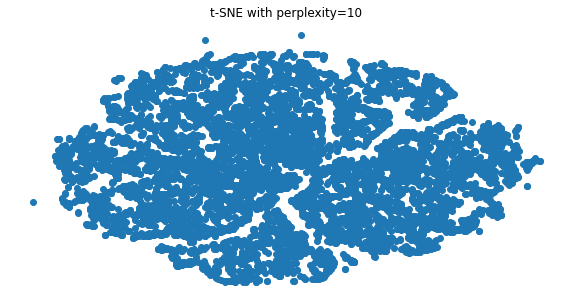

In [9]:
#set a lower perplexity value
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=300)
tsne_results = tsne.fit_transform(X)

plt.figure(figsize=(10,5))
plt.title("t-SNE with perplexity=10")
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.913s...
[t-SNE] Computed neighbors for 10000 samples in 187.715s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.905309
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.144356
[t-SNE] KL divergence after 300 iterations: 2.375485


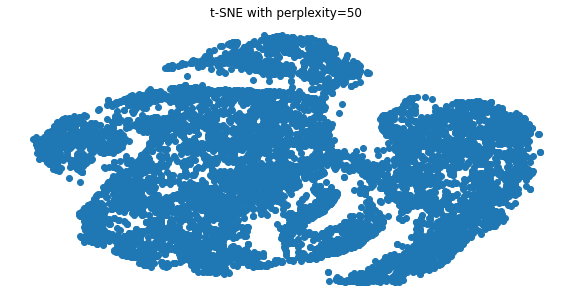

In [11]:
#set higher perplexity
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300)
tsne_results = tsne.fit_transform(X)

plt.figure(figsize=(10,5))
plt.title("t-SNE with perplexity=50")
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

The t-SNE with perplexity set to 50 performs better than with perplexity set to 10. It is easier to distinguish the classes with higher perplexity, at least with this dataset.